In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from torchvision import transforms, datasets
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, SubsetRandomSampler

from utils import *

# Data

## Basic parameters

In [3]:
data_path = 'data/'
train_ratio = 0.8
valid_ratio = 0.2
batch_size = 128

## Dataset

In [4]:
transform = transforms.Compose([transforms.Resize([32, 32]),
                                transforms.Grayscale(),
                                transforms.RandomHorizontalFlip(),  # data augmentation
                                transforms.RandomRotation(10),  # data augmentation
                                transforms.ToTensor()])

dataset = ImageFolder(data_path, transform=transform)

In [8]:
print('Total images:', len(dataset))
print('Total classes:', len(dataset.classes))

Total images: 10160
Total classes: 10


Text(0, 0.5, 'samples')

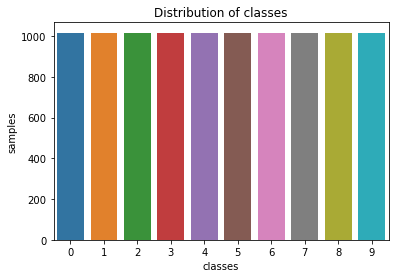

In [12]:
samples_by_class = num_class(dataset)
sns.barplot(x=list(samples_by_class.keys()), y=list(samples_by_class.values()))
plt.title('Distribution of classes')
plt.xlabel('classes')
plt.ylabel('samples')

### Split dataset

In [16]:
train_idx, valid_idx, test_idx = train_valid_test(dataset, train_ratio=0.8, valid_ratio=0.2)
train_sampler = SubsetRandomSampler(train_idx)
valid_sampler = SubsetRandomSampler(valid_idx)
test_sampler = SubsetRandomSampler(test_idx)

print('Train:', len(train_sampler))
print('Valid:', len(valid_sampler))
print('Test:', len(test_sampler))

Train: 6096
Valid: 2032
Test: 2032


## Dataloaders

In [17]:
data_loaders = {
    'train': DataLoader(dataset, sampler=train_sampler, batch_size=batch_size),
    'valid': DataLoader(dataset, sampler=valid_sampler, batch_size=batch_size),
    'test': DataLoader(dataset, sampler=test_sampler, batch_size=batch_size)
            }

### Visualize img example

(<Figure size 432x288 with 1 Axes>,
 <matplotlib.image.AxesImage at 0x1953ea8f288>)

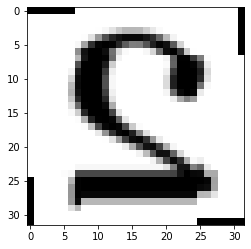

In [18]:
images, labels = iter(data_loaders['train']).next()
images = images.numpy()
img = images[0].squeeze()
plt.figure(), plt.imshow(img, cmap='gray')